In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [3]:
dark = sns.color_palette(palette='Paired')

In [4]:
crystal_pressure = {'d': [0.4975,0.4995], 'p': [20.865, 21.106517], 'dp': [3.55271e-15, 7.10543e-15]}
coex_pressure = {'d': [0.4970,0.4975,0.4980,0.4985,0.499, 0.4995], 'pxx': [21.0049,20.986,20.9675,21.0026,20.9896,21.005 ],
                 'pzz': [20.9998,20.9682,20.9973,20.9622,21.0027,20.9796], 'pyy': [20.9477,20.9525,20.9961,
                           21.0149, 21.003, 20.9917], 'avg': []}

for j,item in enumerate(coex_pressure['pzz']):
    coex_pressure['avg'].append(0.5*(coex_pressure['pzz'][j] +(coex_pressure['pyy'][j] )))

20.985577180930925
0.4984984984984985


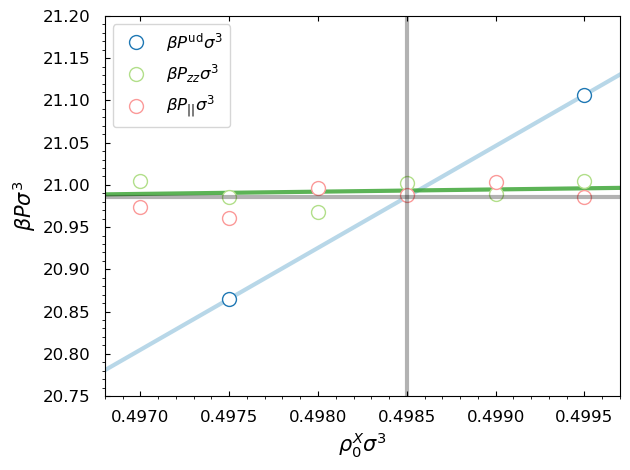

In [6]:

res = linregress(crystal_pressure['d'], crystal_pressure['p'])


slope = res[0]
intercept = res[1]

rho = np.linspace(0,1,1000)
linfit_rho = slope*rho + intercept
plt.plot(rho,linfit_rho, color=dark[0], alpha=0.8, linewidth=3)





res = linregress(coex_pressure['d'], coex_pressure['pxx'])
slope = res[0]
intercept = res[1]

rho = np.linspace(0,1,1000)
linfit_coex = slope*rho + intercept

plt.plot(rho,linfit_coex, color=dark[3], alpha=0.8, linewidth=3)
plt.plot(crystal_pressure['d'], crystal_pressure['p'], 'o', markersize=10, markerfacecolor='white', color=dark[1], label=r'$\beta P^{\mathrm{ud}} \sigma^3$')
plt.plot(coex_pressure['d'], coex_pressure['pxx'], 'o', color=dark[2],markersize=10, markerfacecolor='white', label=r'$\beta P_{zz} \sigma^3$')
plt.plot(coex_pressure['d'], coex_pressure['avg'], 'o', color=dark[4],markersize=10, markerfacecolor='white', label=r'$\beta P_{\vert \vert} \sigma^3$')

ii = np.argmin(np.abs(linfit_rho - linfit_coex))
plt.axhline(linfit_rho[ii], linewidth=3,color='k', alpha=0.3)
plt.axvline(rho[ii], linewidth=3,color='k', alpha=0.3)

print(linfit_rho[ii])
print(rho[ii])

plt.ylim(20.75,21.2)
plt.xlim(0.4968,0.4997)
plt.xlabel(r'$\rho_0^X \sigma^3$', fontsize=15)
plt.ylabel(r'$\beta P \sigma^3$', fontsize=15)
plt.minorticks_on()
plt.tick_params('both',direction='in',top=True,pad=10,labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('coex.png', dpi=300)